# Retail analysis with Walmart  data 

## Import necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import datetime
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta
from scipy.stats import variation

import warnings
warnings.filterwarnings("ignore")

## Load the dataset:

In [2]:
walmart = pd.read_csv(r"C:\Users\IDH\Desktop\simplilearn\Master's Courses\Data science with Python\Project\Walmart_Store_sales.csv")

## Exploratory Data Analysis: 

Before going into the statistical analysis and the predictive modeling, it is necessary to perform EDA. It will help in understandig of the dataset and will have lesser possibility of failure of the Machine-learning model.

Data understanding is one of the crucial parts in the data preprocessing and data-cleaning step. To start with, we will study the datatypes of all the variables.

In [3]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
# Sort out data for store 1
walmart_store1=walmart[walmart.Store==1]
walmart_store1

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
138,1,28-09-2012,1437059.26,0,76.08,3.666,222.981658,6.908
139,1,05-10-2012,1670785.97,0,68.55,3.617,223.181477,6.573
140,1,12-10-2012,1573072.81,0,62.99,3.601,223.381296,6.573
141,1,19-10-2012,1508068.77,0,67.97,3.594,223.425723,6.573


In [5]:
walmart_store1.sort_values('Date',ascending=True)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
60,1,01-04-2011,1495064.75,0,59.17,3.524,214.837166,7.682
121,1,01-06-2012,1624477.58,0,77.95,3.501,221.747214,7.143
73,1,01-07-2011,1488538.09,0,85.55,3.524,215.184137,7.962
34,1,01-10-2010,1453329.50,0,71.89,2.603,211.671989,7.838
108,1,02-03-2012,1688420.76,0,60.96,3.630,220.848045,7.348
...,...,...,...,...,...,...,...,...
25,1,30-07-2010,1371986.60,0,81.84,2.640,211.369903,7.787
86,1,30-09-2011,1394561.83,0,79.69,3.355,216.710596,7.962
99,1,30-12-2011,1497462.72,1,44.55,3.129,219.535990,7.866
134,1,31-08-2012,1582083.40,0,80.49,3.638,222.305481,6.908


### Check for missing values:

In [6]:
walmart.isnull().sum()      
#no null values

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

Though there are no null values in the dataset, it is necessary to check that all the values of each of the variables are numeric or as per the requirement of the variable type. We can verify it using ‘value_counts()’ function.

In [7]:
# Unique values in all the columns
for i in walmart.columns:
    print(walmart[i].value_counts())

43    143
41    143
33    143
29    143
25    143
21    143
17    143
13    143
9     143
5     143
1     143
44    143
40    143
36    143
32    143
28    143
24    143
20    143
16    143
12    143
8     143
37    143
45    143
39    143
2     143
35    143
31    143
27    143
23    143
19    143
15    143
11    143
7     143
3     143
42    143
38    143
34    143
30    143
26    143
22    143
18    143
14    143
10    143
6     143
4     143
Name: Store, dtype: int64
21-01-2011    45
16-03-2012    45
02-09-2011    45
03-02-2012    45
22-07-2011    45
              ..
09-04-2010    45
07-05-2010    45
08-07-2011    45
10-08-2012    45
27-07-2012    45
Name: Date, Length: 143, dtype: int64
300236.85     1
472044.28     1
684783.15     1
998672.85     1
942475.24     1
             ..
645618.59     1
813845.50     1
3766687.43    1
438068.71     1
2066187.72    1
Name: Weekly_Sales, Length: 6435, dtype: int64
0    5985
1     450
Name: Holiday_Flag, dtype: int64
50.43    11
67.87    10

After examining the datatypes and values of all the variables, we will compute the summary statistics of the entire dataset using ‘describe()’ function that will give mean, standard deviation and IQR values of the variables which will roughly give the range and quality of the data that we are about to handle

### Compute Summary statistics of all the variables in the dataset:

In [8]:
walmart.describe(include='all')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
unique,NaN,143,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,21-01-2011,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,45,NaN,NaN,NaN,NaN,NaN,NaN
mean,23.000000,NaN,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,NaN,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,NaN,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,NaN,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,NaN,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000


So far, we have performed quite a bit of EDA (Exploratory Data Analysis). Still, the process of EDA is incomplete without the visual essence. Afterall, “A picture is a worth Thousand Words”. The ‘seaborn’ library, enriched with a wide range of functions that provides high-level interface for drawing attractive and informative statistical graphics

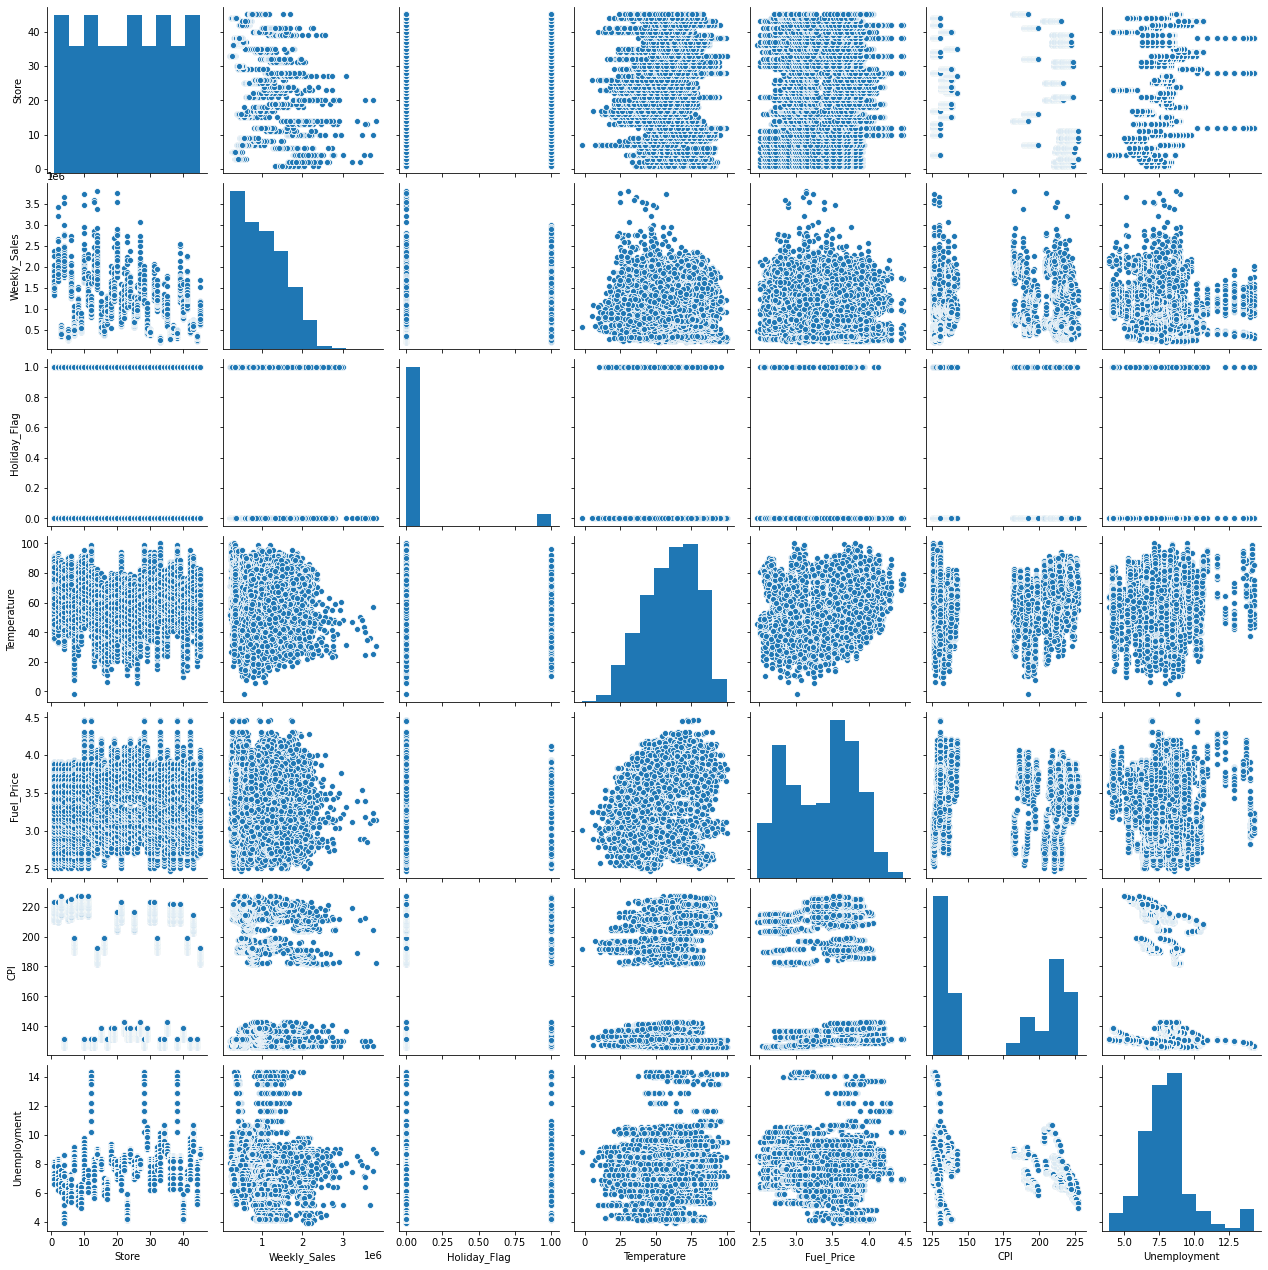

In [9]:
# Plot the features
sns.pairplot(walmart)
plt.savefig('pairplot.png')

# STATISTICAL ANALYSIS

## The store number having maximum sales.

In [10]:
walmart_=walmart.groupby(walmart['Store']).mean()
walmart_=walmart_.reset_index()
walmart_=pd.DataFrame(walmart_)
print('The Maximum sales are :',walmart_.Weekly_Sales.max())
max_sales=walmart_.Store[walmart_['Weekly_Sales']==walmart_['Weekly_Sales'].max()].reset_index()
del max_sales['index']
print('The Store with Maximum sales is :\n',max_sales)
walmart_.head()

The Maximum sales are : 2107676.8703496507
The Store with Maximum sales is :
    Store
0     20


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,1.555264e+06,0.06993,68.306783,3.219699,215.996892,7.610420
1,2,1.925751e+06,0.06993,68.216364,3.219699,215.646311,7.623846
2,3,4.027044e+05,0.06993,71.434196,3.219699,219.391531,7.176986
3,4,2.094713e+06,0.06993,62.253357,3.216972,128.679669,5.964692
4,5,3.180118e+05,0.06993,69.410140,3.219699,216.565581,6.295406


**The store no. 20 has maximum sales of 301397792.46 Units. We will visualize this as well, to confirm our evaluated results.**

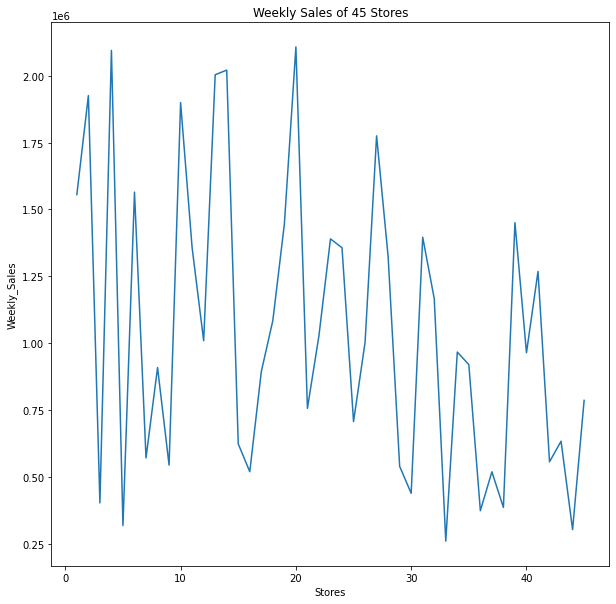

In [11]:
plt.figure(figsize=(10,10))
sns.lineplot(x=walmart_['Store'],y=walmart_['Weekly_Sales'],palette='Blues_d')
plt.title('Weekly Sales of 45 Stores')
plt.xlabel('Stores')
plt.ylabel('Weekly_Sales')
plt.savefig('Max_sales.png')

*If we want the specific date on which specific store has highest Weekly_Sales, we may get different result. However, this study will provide detail information about the store having highest Weekly_Sales and various factors that made its sales highest.*

In [12]:
walmart[walmart['Weekly_Sales']==walmart['Weekly_Sales'].max()]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1905,14,24-12-2010,3818686.45,0,30.59,3.141,182.54459,8.724


**Thus, store no. 14 has highest sales of 3818688.45 units on 24th Dec 2012.**

*We are dealing with very high values of Weekly_Sales. It is therefore we should be aware of the standard deviation of these sales, which will provide quality of the data. Thus, we will determine the standard deviation of all the stores and mark the store, which has highest variation in the weekly sales.*

In [13]:
store_std_dev=walmart.Weekly_Sales.groupby(walmart.Store).std()
store_std_dev=pd.DataFrame(store_std_dev)
store_std_dev=store_std_dev.reset_index()
store_std_dev=store_std_dev.rename(columns={'Weekly_Sales':'Std_dev_of_Weekly_Sales'})
max_stdev=store_std_dev[store_std_dev['Std_dev_of_Weekly_Sales']==
                        store_std_dev['Std_dev_of_Weekly_Sales'].max()].reset_index()
del max_stdev['index']
print('The store with highest variation in weekly_sales is :\n'
      ,max_stdev['Store'])
print('The highest variation in weekly_sales is :\n'
      ,max_stdev['Std_dev_of_Weekly_Sales'])
store_std_dev.head()

The store with highest variation in weekly_sales is :
 0    14
Name: Store, dtype: int64
The highest variation in weekly_sales is :
 0    317569.949476
Name: Std_dev_of_Weekly_Sales, dtype: float64


,Store,Std_dev_of_Weekly_Sales
0,1,155980.767761
1,2,237683.694682
2,3,46319.631557
3,4,266201.442297
4,5,37737.965745


**Thus, the store no. 14 has highest standard deviation of Weekly_Sales of about 317569.949476. We can visualize the results as well.**

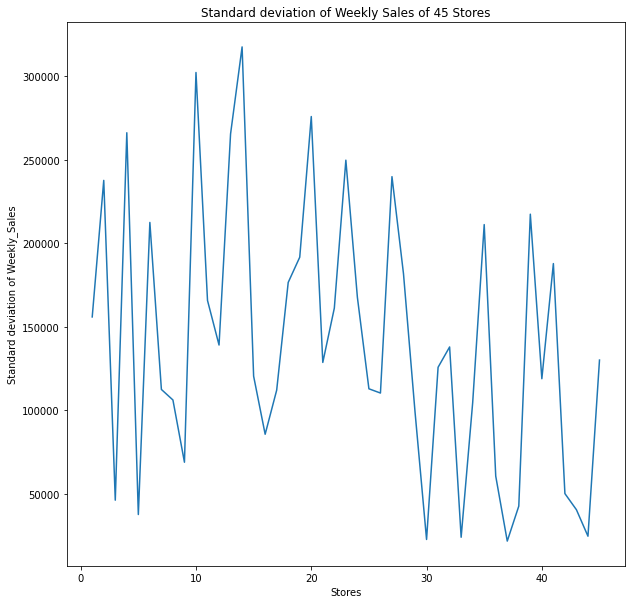

In [14]:
plt.figure(figsize=(10,10))
sns.lineplot(x=store_std_dev['Store'],y=store_std_dev['Std_dev_of_Weekly_Sales'],palette='Blues_d')
plt.title('Standard deviation of Weekly Sales of 45 Stores')
plt.xlabel('Stores')
plt.ylabel('Standard deviation of Weekly_Sales')
plt.savefig('highest_std.png')

Apart from the standard deviation, another way to determine variation in the data is using ‘Coefficient of variation’ or we can say relative variability. The data of Weekly_Sales that we are working on is of 45 stores at different days. Thus, the mean for each store will be different and the standard deviation will have different importance based on this mean. Therefore, it is better to determine coefficient of variation for this dataset. Lower the value of coefficient of variation more precise is the data. We can calculate the ‘coefficient of variation’ using- 

**𝐶𝑜𝑒𝑓.𝑜𝑓 𝑣𝑎𝑟𝑖𝑎𝑡𝑖𝑜𝑛=𝑆𝑡𝑎𝑛𝑑𝑎𝑟𝑑 𝐷𝑒𝑣𝑖𝑎𝑡𝑖𝑜𝑛 / 𝑀𝑒𝑎𝑛∗100**

In [15]:
data=walmart.Weekly_Sales.groupby(walmart.Store).describe()
data=data.reset_index()
CV=pd.DataFrame()
CV=data[['Store','mean','std']]
#calculate coef of variation for each store and join with the CV dataframe
cv=CV.iloc[:,2]/CV.iloc[:,1]*100
CV.insert(3,'_CV_',cv,True)
print(CV.head())
#find maximum CV and corresponding store no
cv_max=CV[CV['_CV_']==CV['_CV_'].max()]
print('Maximum Coefficient of variation :', cv_max['_CV_'].values)
print('Store with maximum coefficient of variation',cv_max['Store'].values)
print('Coefficient Of variation of Store no 14:\n',CV[CV.Store==14])

   Store          mean            std       _CV_
0      1  1.555264e+06  155980.767761  10.029212
1      2  1.925751e+06  237683.694682  12.342388
2      3  4.027044e+05   46319.631557  11.502141
3      4  2.094713e+06  266201.442297  12.708254
4      5  3.180118e+05   37737.965745  11.866844
Maximum Coefficient of variation : [22.96811139]
Store with maximum coefficient of variation [35]
Coefficient Of variation of Store no 14:
     Store          mean            std       _CV_
13     14  2.020978e+06  317569.949476  15.713674


**Even though the store no. 14 has highest standard deviation of 317569.95, its coefficient of variation is 15.71%. The coefficient of variation is highest for store no 35, the value of which is 22.97%.** Which clearly suggests that sometimes, just the standard deviation is not enough to determine the dispersion of the values. Instead, coefficient of variation is more informative. Finally, we conclude that store no. 35 has highest variability in weekly sales relative to its mean. We will verify the same using visual representation.

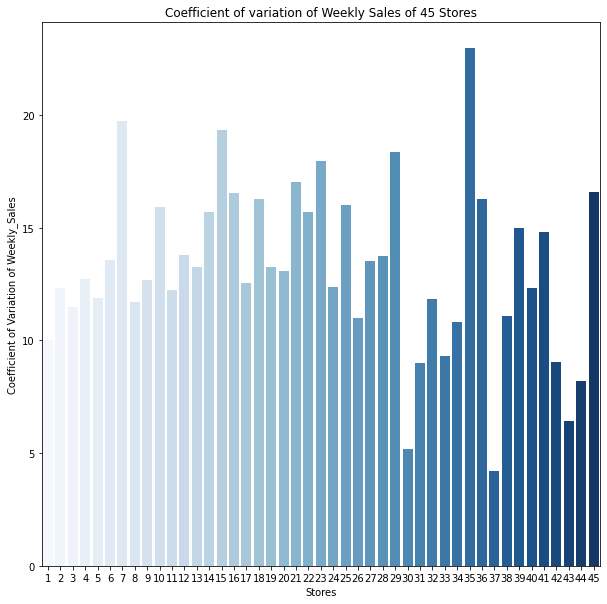

In [16]:
#plot aslo indicate highest CV is of store 35
plt.figure(figsize=(10,10))
sns.barplot(x=CV['Store'],y=CV['_CV_'],palette='Blues')
plt.title('Coefficient of variation of Weekly Sales of 45 Stores')
plt.xlabel('Stores')
plt.ylabel('Coefficient of Variation of Weekly_Sales')
plt.savefig('cv_plot.png')

**Now the question is to determine which store has good quarterly growth rate in third quarter of year 2012.**

To tackle this, we will first convert the ‘Date’ variable into datetime format for using it in further analysis, and sort out the data of all the stores for the year 2012. While sorting out, we will create separate columns for each quarter and then combine them into a dataframe.

In [17]:
#Convert datatype of Date variable into datetime format
walmart['Date']=pd.to_datetime(walmart['Date'])
sorted_date=walmart.sort_values(by='Date')

# Sort out the data of third quarter in 2012
mask=(walmart['Date']>'2012-07-01') & (walmart['Date']<= '2012-09-30')
walmart_Q3=walmart.loc[mask]
Q3=walmart_Q3.iloc[:,0:3]
Q3_sales=Q3.Weekly_Sales.groupby(Q3.Store).sum()

# Sort out the data of second quarter in 2012
mask=(walmart['Date']>'2012-04-01') & (walmart['Date']<= '2012-06-30')
walmart_Q2=walmart.loc[mask]
Q2=walmart_Q2.iloc[:,0:3]
Q2_sales=Q2.Weekly_Sales.groupby(Q2.Store).sum()

# Sort out the data of second quarter in 2012
mask=(walmart['Date']>'2012-01-01') & (walmart['Date']<= '2012-03-31')
walmart_Q1=walmart.loc[mask]
Q1=walmart_Q1.iloc[:,0:3]
Q1_sales=Q1.Weekly_Sales.groupby(Q1.Store).sum()

#Combine the data of the three quartes into a dataframe
total_sales=pd.DataFrame()
total_sales['Q1_sales']=Q1_sales
total_sales['Q2_sales']=Q2_sales
total_sales['Q3_sales']=Q3_sales
total_sales=total_sales.reset_index()
total_sales.head()

,Store,Q1_sales,Q2_sales,Q3_sales
0,1,18951097.69,21036965.58,18633209.98
1,2,22543946.63,25085123.61,22396867.61
2,3,4957435.81,5562668.16,4966495.93
3,4,25659307.85,28384185.16,25652119.35
4,5,3912829.61,4427262.21,3880621.88


We are now in a position to determine the quarterly growth rate (Rate) of all the stores in the year 2012. We will make use of the following formula: 

**𝑅𝑎𝑡𝑒=(𝑇𝑜𝑡𝑎𝑙 𝑠𝑎𝑙𝑒𝑠 𝑖𝑛 𝑐𝑢𝑟𝑟𝑒𝑛𝑡 𝑞𝑢𝑎𝑟𝑡𝑒𝑟−𝑇𝑜𝑡𝑎𝑙 𝑠𝑎𝑙𝑒𝑠 𝑖𝑛 𝑝𝑟𝑒𝑣𝑖𝑜𝑢𝑠 𝑞𝑢𝑎𝑟𝑡𝑒𝑟) / 𝑇𝑜𝑡𝑎𝑙 𝑠𝑎𝑙𝑒𝑠 𝑖𝑛 𝑝𝑟𝑒𝑣𝑖𝑜𝑢𝑠 𝑞𝑢𝑎𝑟𝑡𝑒𝑟∗100**

In [18]:
total_sales['Growth_Rate_Q3']=((total_sales['Q3_sales']-total_sales['Q2_sales'])/total_sales['Q2_sales'])*100
total_sales.head()

,Store,Q1_sales,Q2_sales,Q3_sales,Growth_Rate_Q3
0,1,18951097.69,21036965.58,18633209.98,-11.426342
1,2,22543946.63,25085123.61,22396867.61,-10.716535
2,3,4957435.81,5562668.16,4966495.93,-10.717379
3,4,25659307.85,28384185.16,25652119.35,-9.625310
4,5,3912829.61,4427262.21,3880621.88,-12.347142


**It is found that the growth rate in third quarter is negative for all the stores. A negative growth rate indicates that the stores faced losses in third quarter of 2012.** Therefore, we will find the stores having minimum and maximum losses.

In [19]:
print('Minimum loss in third quarter:\n',total_sales.sort_values('Growth_Rate_Q3',ascending=False).head(1))
print('Maximum loss in third quarter:\n',total_sales.sort_values('Growth_Rate_Q3',ascending=False).tail(1))

Minimum loss in third quarter:
     Store    Q1_sales    Q2_sales    Q3_sales  Growth_Rate_Q3
15     16  5982535.66  6626133.44  6441311.11       -2.789294
Maximum loss in third quarter:
     Store     Q1_sales     Q2_sales    Q3_sales  Growth_Rate_Q3
13     14  22225623.53  24427769.06  20140430.4      -17.551086


**The store no. 16 faced a minimum loss of 2.79% whereas the store no. 14 faced a maximum loss of 17.55%.**

***Some holidays found to have a negative impact on sales. Hence we will inspect which holidays have higher sales than the mean sales in non-holiday season for all stores together.***

For this, we will first mark the holiday dates and then compare the dates with the ‘Date’ column of original dataset. In this way we will split the dataset based on various holiday dates as well as non-holiday dates. Then we will take up mean of each of them separately and will determine which holiday has higher sales than the non-holiday sales.

**Holiday Events**

*Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13*

*Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13*

*Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13*

*Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13*

In [20]:
# Mark the holiday dates
super_bowl1=pd.Timestamp(date(2010,2,12))
super_bowl2=pd.Timestamp(date(2011,2,11))
super_bowl3=pd.Timestamp(date(2012,2,10))
super_bowl4=pd.Timestamp(date(2013,2,8))

labour_day1=pd.Timestamp(date(2010,9,10))
labour_day2=pd.Timestamp(date(2011,9,9))
labour_day3=pd.Timestamp(date(2012,9,7))
labour_day4=pd.Timestamp(date(2013,9,6))

thanksgiving1=pd.Timestamp(date(2010,11,26))
thanksgiving2=pd.Timestamp(date(2011,11,25))
thanksgiving3=pd.Timestamp(date(2012,11,23))
thanksgiving4=pd.Timestamp(date(2013,11,29))

christmas1=pd.Timestamp(date(2010,12,31))
christmas2=pd.Timestamp(date(2011,12,30))
christmas3=pd.Timestamp(date(2012,12,28))
christmas4=pd.Timestamp(date(2013,12,27))

In [21]:
#determine mean sales during holidays
super_bowl_mean=walmart[(walmart['Date']==super_bowl1) | (walmart['Date']==super_bowl2) |
                        (walmart['Date']==super_bowl3) |(walmart['Date']==super_bowl4)]
labour_day_mean=walmart[(walmart['Date']==labour_day1) | (walmart['Date']==labour_day2) |
                        (walmart['Date']==labour_day4) |(walmart['Date']==labour_day3)]
thanksgiving_mean=walmart[(walmart['Date']==thanksgiving1) | (walmart['Date']==thanksgiving2) |
                         (walmart['Date']==thanksgiving3) |(walmart['Date']==thanksgiving4)]
christmas_mean=walmart[(walmart['Date']==christmas1) | (walmart['Date']==christmas2) | 
                       (walmart['Date']==christmas3) | (walmart['Date']==christmas4)]

#displaying list of mean of holiday sales
sales={'Super_Bowl_Mean': round(super_bowl_mean['Weekly_Sales'].mean(),2),
              'Labour_Day_Mean' : round(labour_day_mean['Weekly_Sales'].mean(),2),
              'Thanksgiving_Mean' : round(thanksgiving_mean['Weekly_Sales'].mean(),2),
              'Christmas_Mean' : round(christmas_mean['Weekly_Sales'].mean(),2),
      'Non_Holiday_Sales_Mean' : round(walmart[walmart['Holiday_Flag']==0]['Weekly_Sales'].mean(),2)}
sales

{'Super_Bowl_Mean': nan,
 'Labour_Day_Mean': 1039182.83,
 'Thanksgiving_Mean': 1471273.43,
 'Christmas_Mean': 960833.11,
 'Non_Holiday_Sales_Mean': 1041256.38}

**We will now explore the monthly, quarterly , semester and yearly view of Weekly_Sales of all the 45 stores of walmart.**

*We will make use of a ‘groupby’ and ‘Grouper’ function in pandas. We first group the sales for each month, then for quarter, then for semester and for year. It is easier to draw insights from the plot. So we will make use of ‘seaborn’ and ‘matplotlib’ library to plot all these graphs together.*

Maximum Monthly sales:
 11   2010-12-31
Name: Date, dtype: datetime64[ns]

Maximum Quarterly sales:
 4   2011-01-31
Name: Date, dtype: datetime64[ns]

Maximum Semester-sales:
 2   2011-01-31
Name: Date, dtype: datetime64[ns]

Maximum Yearly-sales:
 1   2011-12-31
Name: Date, dtype: datetime64[ns]


<Figure size 432x288 with 0 Axes>

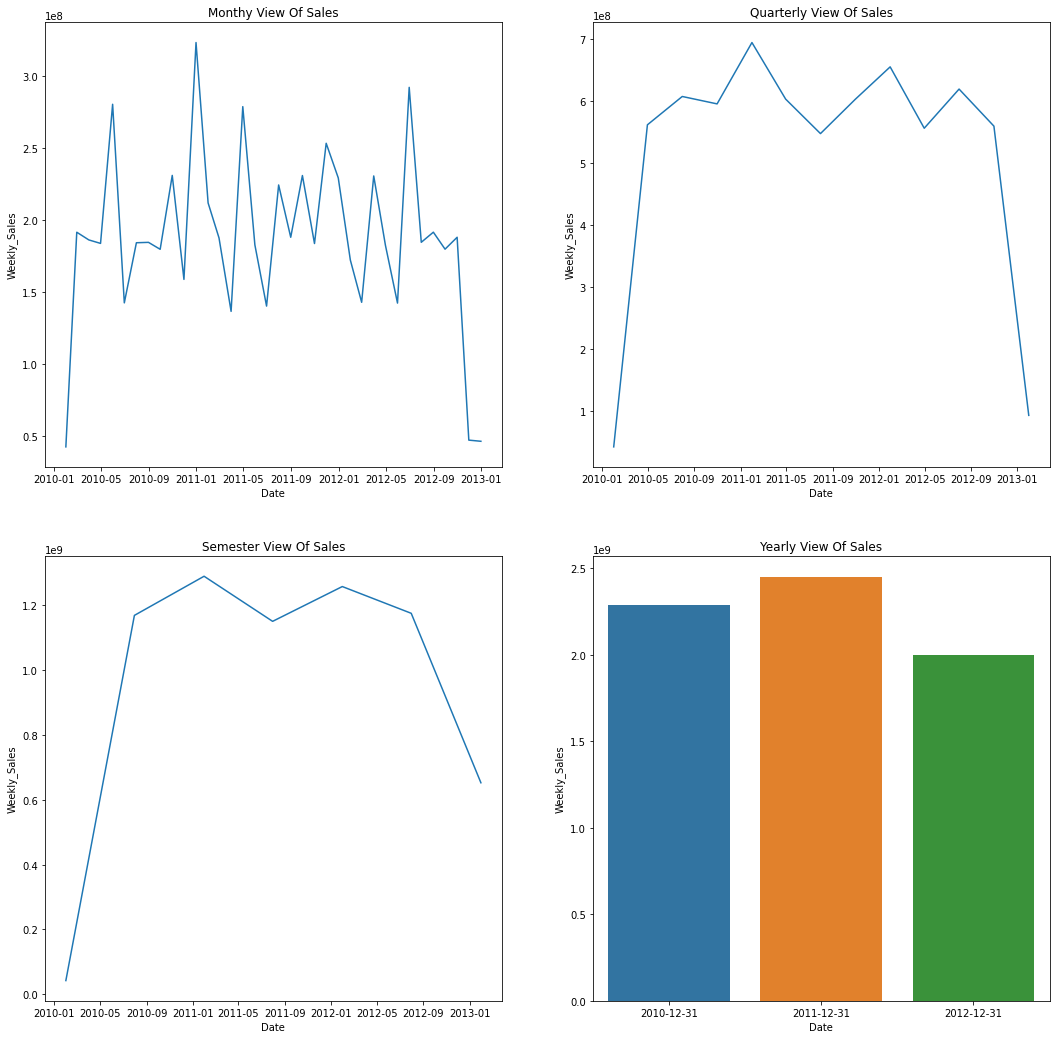

In [22]:
plt.figure(1)
plt.figure(figsize=(18,18))
plt.subplot(221)
#Monthly view of sales
monthly=walmart.groupby(pd.Grouper(key='Date',freq='1M')).sum()
monthly=monthly.reset_index()
sns.lineplot(x=monthly.Date,y=monthly.Weekly_Sales)
plt.title('Monthy View Of Sales')
print('Maximum Monthly sales:\n',monthly[monthly.Weekly_Sales==monthly.Weekly_Sales.max()]['Date'])
print()

#Quarterly view of sales
plt.subplot(222)
quarterly=walmart.groupby(pd.Grouper(key='Date',freq='3M')).sum()
quarterly=quarterly.reset_index()
sns.lineplot(x=quarterly.Date,y=quarterly.Weekly_Sales)
plt.title('Quarterly View Of Sales')
print('Maximum Quarterly sales:\n',quarterly[quarterly.Weekly_Sales==quarterly.Weekly_Sales.max()]['Date'])
print()

#semester view of sales
plt.subplot(223)
semester=walmart.groupby(pd.Grouper(key='Date',freq='6M')).sum()
semester=semester.reset_index()
sns.lineplot(x=semester.Date,y=semester.Weekly_Sales)
plt.title('Semester View Of Sales')
print('Maximum Semester-sales:\n',semester[semester.Weekly_Sales==semester.Weekly_Sales.max()]['Date'])
print()

#yearly view
plt.subplot(224)
yearly=walmart.groupby(pd.Grouper(key='Date',freq='1Y')).sum()
yearly=yearly.reset_index()
sns.barplot(x=yearly.Date.dt.date,y=yearly.Weekly_Sales)
plt.title('Yearly View Of Sales')
print('Maximum Yearly-sales:\n',yearly[yearly.Weekly_Sales==yearly.Weekly_Sales.max()]['Date'])
plt.savefig('sales.png')

The coverall conclusion from the above graphs is the sales were highest in the year 2011

**With this we are done with the statestical analysis of the dataset. The conclusions that we had drawn from the above study will be useful for building appropriate ML model that can predict sales of the stores correctly.**

# Prediction Model building to forecast the weekly sales: 

**We now start building machine-learning model to predict the sales of the stores, and the factors that affects the sales. The retailers can use this information to increase their sales as well. The steps that we will follow are:** 

*1. Importing necessary machine learning libraries* 

*2. Encode the non-numeric variables that will be used in the model building.* 

*3. Feature selection 4. Model building and evaluation and Optimization*

**1.Import necessary machine learning libraries:**

In [23]:
#to treat date variable
from datetime import datetime
from datetime import date
from datetime import timedelta

#For feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#for Encoding
from sklearn.preprocessing import LabelEncoder

#for model building and evaluation
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

**2.Encode the non-numeric variables that will be used in the model building.**

In [24]:
walmart.sort_values(by=['Date'],ascending=True)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
606,5,2010-01-10,283178.12,0,71.10,2.603,212.226946,6.768
2036,15,2010-01-10,566945.95,0,59.69,2.840,132.756800,8.067
5897,42,2010-01-10,481523.93,0,86.01,3.001,126.234600,9.003
4610,33,2010-01-10,224294.39,0,91.45,3.001,126.234600,9.265
5039,36,2010-01-10,422169.47,0,74.66,2.567,210.440443,8.476
...,...,...,...,...,...,...,...,...
5860,41,2012-12-10,1409544.97,0,39.38,3.760,199.053937,6.195
2285,16,2012-12-10,491817.19,0,43.26,3.760,199.053937,5.847
1427,10,2012-12-10,1713889.11,0,76.03,4.468,131.108333,6.943
3572,25,2012-12-10,697317.41,0,43.74,4.000,216.115057,7.293


We will create a new column, named ‘Days’ that will set the first date( Jan 10, 2010 ) as a reference and count the other dates in accordance to this reference date

In [25]:
date1=datetime(2010,1,10) #y m d
date2=walmart['Date']
delta=date2-date1
delta=delta.dt.days
walmart['Days']=delta
walmart.sort_values(by='Days')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Days
606,5,2010-01-10,283178.12,0,71.10,2.603,212.226946,6.768,0
2036,15,2010-01-10,566945.95,0,59.69,2.840,132.756800,8.067,0
5897,42,2010-01-10,481523.93,0,86.01,3.001,126.234600,9.003,0
4610,33,2010-01-10,224294.39,0,91.45,3.001,126.234600,9.265,0
5039,36,2010-01-10,422169.47,0,74.66,2.567,210.440443,8.476,0
...,...,...,...,...,...,...,...,...,...
5860,41,2012-12-10,1409544.97,0,39.38,3.760,199.053937,6.195,1065
2285,16,2012-12-10,491817.19,0,43.26,3.760,199.053937,5.847,1065
1427,10,2012-12-10,1713889.11,0,76.03,4.468,131.108333,6.943,1065
3572,25,2012-12-10,697317.41,0,43.74,4.000,216.115057,7.293,1065


We will first build the model for store number 1 and analyse its performace in predicting the future sales. For this, we first sort out the data for store no. 1 form the entire dataset. Along with this, we will describe the ‘Date’ Variable for store number 1 and gather the information about the start date, end date, its frequency and count. We then sort the new data by the ‘Days’ variable.

In [26]:
walmart_store1=walmart[walmart['Store']==1]
walmart_store1['Date'].describe(include='All')

count                     143
unique                    143
top       2011-04-29 00:00:00
freq                        1
first     2010-01-10 00:00:00
last      2012-12-10 00:00:00
Name: Date, dtype: object

In [27]:
walmart_store1.sort_values(by=['Days'])

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Days
34,1,2010-01-10,1453329.50,0,71.89,2.603,211.671989,7.838,0
8,1,2010-02-04,1594968.28,0,62.27,2.719,210.820450,7.808,25
21,1,2010-02-07,1492418.14,0,80.91,2.669,211.223533,7.787,28
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,40
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,47
...,...,...,...,...,...,...,...,...,...
131,1,2012-10-08,1592409.97,0,85.05,3.494,221.958433,6.908,1002
141,1,2012-10-19,1508068.77,0,67.97,3.594,223.425723,6.573,1013
142,1,2012-10-26,1493659.74,0,69.16,3.506,223.444251,6.573,1020
118,1,2012-11-05,1611096.05,0,73.77,3.688,221.725663,7.143,1030


The ‘Date’ variable will play crucial part in the model building. Thus, at some point of time we will have to apply label encoding to this ‘Date’ variable. However, the new variable that we created (‘Days’). Will provide aletrneate way to encode the dates.

### Encode the date variable using days

In [28]:
le=LabelEncoder()
walmart['Date_enc']=le.fit_transform(walmart['Date'])
walmart=walmart.reset_index()
del walmart["index"]
walmart=walmart.sort_values(by=['Date_enc'])
walmart

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Days,Date_enc
606,5,2010-01-10,283178.12,0,71.10,2.603,212.226946,6.768,0,0
2036,15,2010-01-10,566945.95,0,59.69,2.840,132.756800,8.067,0,0
5897,42,2010-01-10,481523.93,0,86.01,3.001,126.234600,9.003,0,0
4610,33,2010-01-10,224294.39,0,91.45,3.001,126.234600,9.265,0,0
5039,36,2010-01-10,422169.47,0,74.66,2.567,210.440443,8.476,0,0
...,...,...,...,...,...,...,...,...,...,...
5860,41,2012-12-10,1409544.97,0,39.38,3.760,199.053937,6.195,1065,142
2285,16,2012-12-10,491817.19,0,43.26,3.760,199.053937,5.847,1065,142
1427,10,2012-12-10,1713889.11,0,76.03,4.468,131.108333,6.943,1065,142
3572,25,2012-12-10,697317.41,0,43.74,4.000,216.115057,7.293,1065,142


**Feature selection:**

The dataset under study contains large number of features that may or may not affect the sales of the stores in the walmart. There is a possibility of existance of complex and unknown relationship between these variables, that will reduce the power of the regression model to identify the statestically signifinact independent variables. Which ultimately will reduce the precision of estimate and weakens the statetsical power of the prediction model. Thus, it is important to understand the extent of dependence of one independent variable on other independent variable. If the extent of correlation is higher in between two variables, we have to drop one of the two variables from the ML model.
This study will also help in feature selection for the model. We will use following methods to identify the correalation between the independent variables and to determine the importance of each variable in model building.

1. Feature Importance - In built class for model (for tree based regressor)
2. Correlation matrix with heatmap - Using pearson- correlation tenchique


**1. Feature Importance - In built class for model(for tree based regressor)**

Extra Trees Regressor : [0.01412065 0.37682294 0.02745371 0.21828212 0.12786469 0.11816282
 0.11729307]
Decision Tree Regressor: [0.01229532 0.34125115 0.02008699 0.2317659  0.12587659 0.13967527
 0.12904878]
Random Forest Reressor : [0.01378933 0.34983285 0.01586306 0.21043247 0.11594204 0.14640986
 0.14773039]


<Figure size 432x288 with 0 Axes>

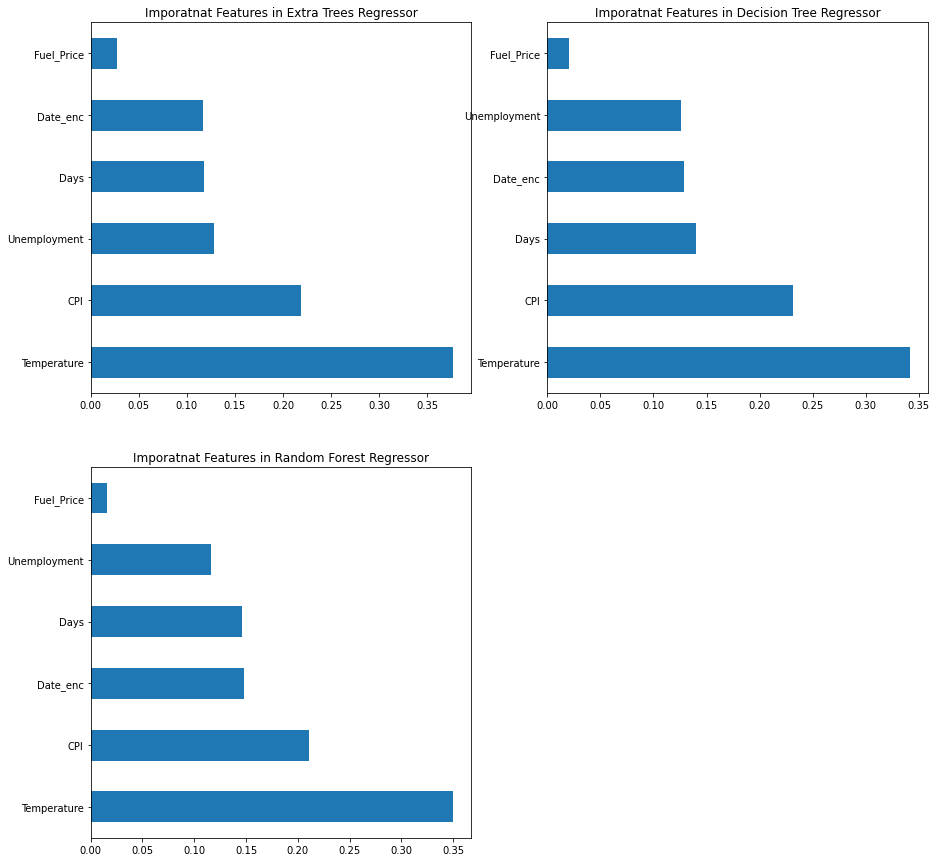

In [29]:
plt.figure(1)
plt.figure(figsize=(15,15))
X = walmart.iloc[:,3:]  #independent columns
y = walmart.iloc[:,2]    #target column i.e price range
X=X.astype('int')
y=y.astype('int')

#for Extra trees regressor
plt.subplot(2,2,1)
model = ExtraTreesRegressor()
model.fit(X,y)
print('Extra Trees Regressor :',model.feature_importances_) #use inbuilt class feature_importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.title('Imporatnat Features in Extra Trees Regressor')

#for decision tree regressor
plt.subplot(2,2,2)
model = DecisionTreeRegressor()
model.fit(X,y)
print('Decision Tree Regressor:',model.feature_importances_) #use inbuilt class feature_importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.title('Imporatnat Features in Decision Tree Regressor')

#for Random Forest Regressor
plt.subplot(2,2,3)
model = RandomForestRegressor()
model.fit(X,y)
print('Random Forest Reressor :',model.feature_importances_) #use inbuilt class feature_importances 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.title('Imporatnat Features in Random Forest Regressor')
plt.savefig('feature.png')

All the features have good significance in the machine-learning model. Therefore, we will just check the correlation between variables and then drop one of the correlated variables

**2. Correlation matrix with heatmap - Using pearson- correlation tenchique**

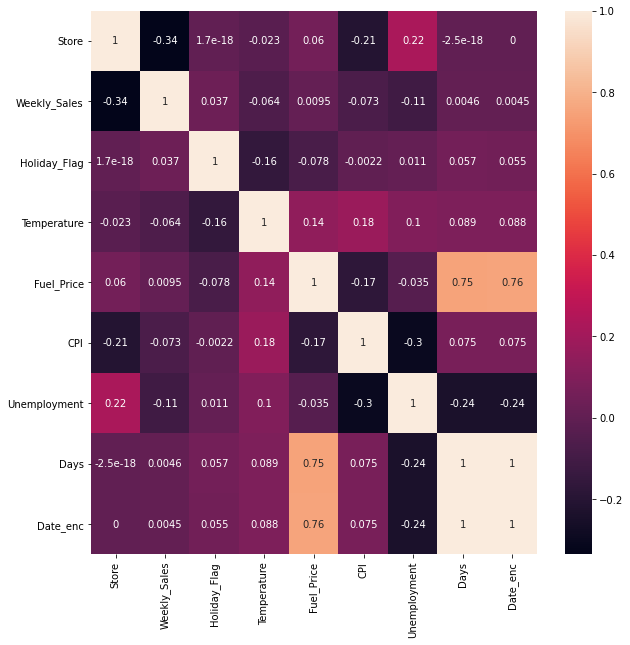

In [30]:
corr=walmart.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.plot()
plt.savefig('corr.png')

From the heatmap, we can see that the ‘Fuel_Price’ and ‘Days’ are highly correlated Thus, we will drop ‘Fuel_Price’ column from the regression model.

We have done quite a good study about the feature importance and correlation between the variables. We will utilize the conclusions of this part in predictive model building.

# Model building and evaluation: 

In [31]:
#Set the dependent and independent variables
x=(walmart.drop(["Weekly_Sales",'Date','Days','Fuel_Price'],axis=1))
y=np.array(walmart['Weekly_Sales'])
#Split the dataset into training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
print(x_test.head())

(5148, 6) (1287, 6) (5148,) (1287,)
      Store  Holiday_Flag  Temperature         CPI  Unemployment  Date_enc
2912     21             0        36.33  212.224065         8.028        60
1624     12             0        50.74  127.580032        14.021        52
2976     21             0        69.21  221.255812         6.891       115
4224     30             0        91.56  215.136382         7.852        77
1150      9             0        53.15  214.759727         6.415         7


In [33]:
#LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print('linear_model score:',model.score(x_test,y_test)*100)
print('Mean squared error of Linear regressor: ',mean_squared_error(y_test,y_pred))
print()

#DecisionTreeRegressor 
tree=DecisionTreeRegressor(random_state=0)
tree.fit(x_train,y_train)
y_pred=tree.predict(x_test)
print('Decision Tree Regressor score: ',tree.score(x_test,y_test)*100)
print('Mean squared error of Decision Tree regressor: ',mean_squared_error(y_test,y_pred))
print()

#RandomForestRegressor
reg=RandomForestRegressor(n_estimators=30,random_state=0,n_jobs=5,max_depth=12)
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
print('Random Forest Regressor score:',reg.score(x_test,y_test)*100)
print('Mean squared error of Random Forest regressor: ',mean_squared_error(y_test,y_pred))
print()

#ExtraTreesRegressor
etr = ExtraTreesRegressor(n_estimators=30,random_state=0,n_jobs=10) 
etr.fit(x_train,y_train)
y_pred=etr.predict(x_test)
print('Extra Trees Rgressor score: ',etr.score(x_test,y_test)*100)
print('Mean squared error of Extra Trees regressor: ',mean_squared_error(y_test,y_pred))
print()

#Cross-val-score technique 
print()
print('Applying Cross_Val_Score....')
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=reg,X=x_train,y=y_train,cv=50)
print('Accuracy Of Random forest Regressor::',(accuracies.mean()*100))
print('Standard deviation: ',(accuracies.std()*100))

linear_model score: 13.786013613512626
Mean squared error of Linear regressor:  271789967357.06827

Decision Tree Regressor score:  89.38293380417048
Mean squared error of Decision Tree regressor:  33470347396.49399

Random Forest Regressor score: 93.16605882395963
Mean squared error of Random Forest regressor:  21544029304.359528

Extra Trees Rgressor score:  93.71497797734862
Mean squared error of Extra Trees regressor:  19813559283.956352


Applying Cross_Val_Score....
Accuracy Of Random forest Regressor:: 93.72134177247264
Standard deviation:  2.5479593835116736


**We got an excellent accuracy of 93% using Extra trees Regressor model. We have also used cross_val_score method on random forest regressor model and evaluated accuracy for 50 folds, and got an accuracy of 93%, with a standard deviation of 2.95, which is also excellent.**

# **CONCLUSION:**

 In conclusion, we can say that first we have performed data understanding and cleaning.

 Then we have done data wrangling and exploratory data analysis including the evaluation of standard deviation, coefficient of variation, store having maximum sales, monthly quarterly, semester and yearly view of the sales.

 Afterwards, we have used various techniques for feature selection and used all the above results to build a ML model for predicting sales of store no.1

 Finally, we build the ML model for all the 45 stores and as expected, we got a good accuracy (93%) using Extra trees regressor model as well as with Random Forest Regressor model.